In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.shape

(4177, 9)

In [4]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [5]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# Summary Statistics

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Observations:
    1. The mean is always greater than median for all the columns.
    2. There is a large difference between standard deviation and mean for the column of Rings.

Exploring data variable

In [8]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [9]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [10]:
list=[]
for value in df['Rings']:
    if value>=11:
        value=1
        list.append(value)
    else:
        value=0
        list.append(value)
        

In [11]:
list

[1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [12]:
array=np.array([list])
array

array([[1, 0, 0, ..., 0, 0, 1]])

In [13]:
abalone=pd.DataFrame(list,columns=['Rings'])
abalone
abalone['Rings'].value_counts()

0    2730
1    1447
Name: Rings, dtype: int64

In [14]:
df.drop('Rings',axis=1,inplace=True)

In [15]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [16]:
df_1=pd.concat((df,abalone),axis=1)
df_1['Rings'].value_counts()

0    2730
1    1447
Name: Rings, dtype: int64

In [17]:
df_1['Rings'].astype(str)

0       1
1       0
2       0
3       0
4       0
       ..
4172    1
4173    0
4174    0
4175    0
4176    1
Name: Rings, Length: 4177, dtype: object

In [18]:
df_1.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


# Data Visualizations

To check missing values

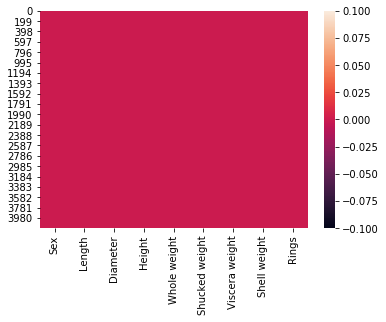

In [19]:
sns.heatmap(df_1.isnull())

In [20]:
df_1.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Dataset has no missing values

# To check correlation

In [21]:
dfcor=df_1.corr()
dfcor

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.406680
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.424176
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.419496
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.438697
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.343188
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.416863
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.501901
Rings,0.406680,0.424176,0.419496,0.438697,0.343188,0.416863,0.501901,1.000000


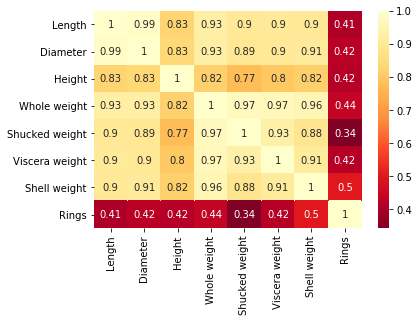

In [22]:
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

Observations:
    1. Rings are highly positively correlated with shell weight.
    2. shell weight is highly negatively correlated with Height.
    3. Height is highly positively correlated with diameter.
    4. Shucked Weight is higly negatively correlated with rings.

# Bivariate Analysis

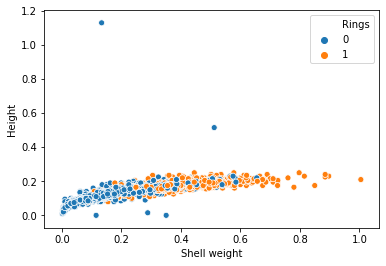

In [23]:
sns.scatterplot(x='Shell weight',y='Height',data=df_1,hue='Rings')

Observations:-
    
1. Shells with number of rings less than or equal to 11 (0) are present in higher heights also, like 1.2.
2. shell weight and height are positively correlated.

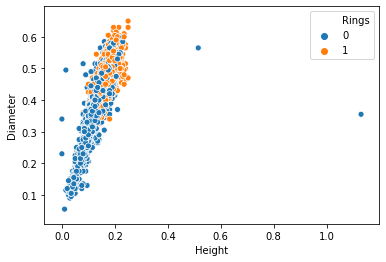

In [24]:
sns.scatterplot(x='Height',y='Diameter',data=df_1,hue='Rings')

Observations :-
    
1. Shells with number of rings greater than 11 (1) are present in larger diameters also.
2. Diameter and height are positively correlated.

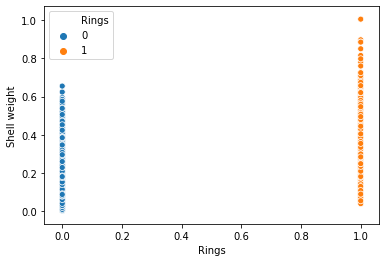

In [25]:
sns.scatterplot(x='Rings',y='Shell weight',data=df_1,hue='Rings')

Observations:-
    
1. Shells with number of rings greater than 11 (1) have more shell weight than Shells with number of rings less than and equal
to 11 (0).

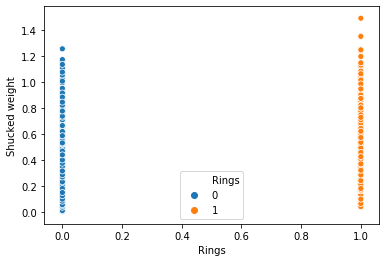

In [26]:
sns.scatterplot(x='Rings',y='Shucked weight',data=df_1,hue='Rings')

Observations:-
    
1. Shells with number of rings greater than 11 (1) have more shucked weight than Shells with number of rings less than and equal
to 11 (0).

# Univariate Analysis

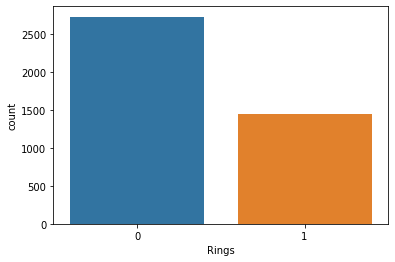

In [27]:
sns.countplot(x='Rings',data=df_1)

Observations:-
    
1. Shells with number of rings less than and equal to 11 (0) are present more in data as compared to Shells with number of rings greater than 11 (1).



# Plotting outliers

Length               AxesSubplot(0.125,0.536818;0.168478x0.343182)
Diameter          AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Height            AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Whole weight      AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Shucked weight          AxesSubplot(0.125,0.125;0.168478x0.343182)
Viscera weight       AxesSubplot(0.327174,0.125;0.168478x0.343182)
Shell weight         AxesSubplot(0.529348,0.125;0.168478x0.343182)
Rings                AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

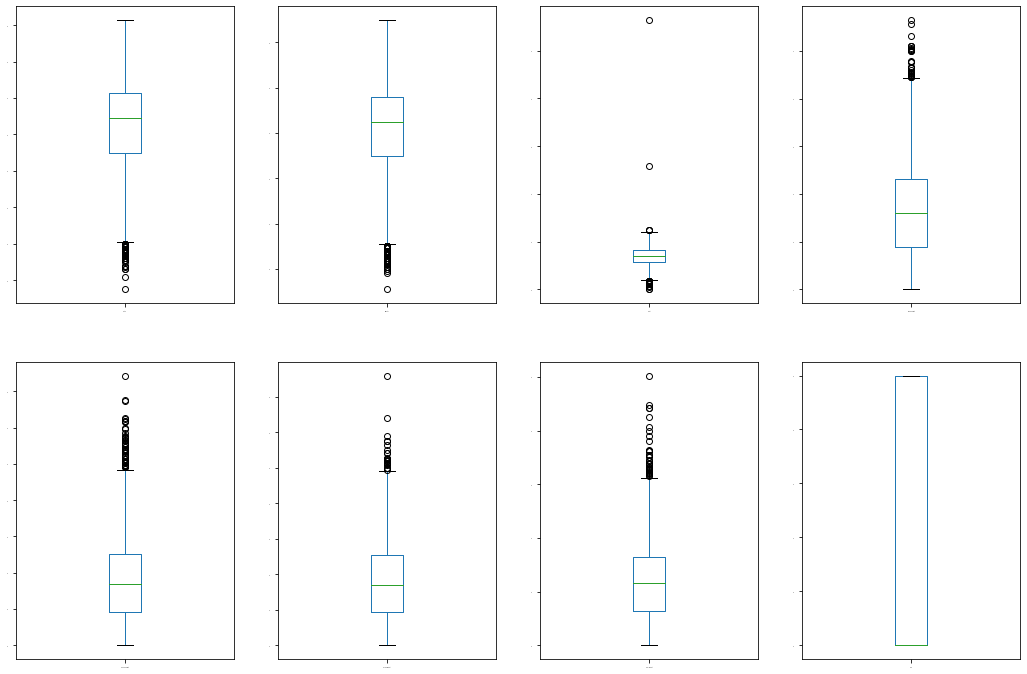

In [28]:
df_1.plot(kind='box',subplots=True,layout=(2,4),sharex=False,fontsize=1,figsize=(18,12))

Observations :-
    
1. All columns have outliers except the column of rings.

In [29]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_1['Sex']=LE.fit_transform(df_1['Sex'])

In [30]:
df_1.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


# Outliers Removal

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(df_1))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.37355817],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.72803615],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.72803615],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.72803615],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.72803615],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        1.37355817]])

In [32]:
threshold=3
print(np.where(z>3))

(array([  81,  129,  163,  164,  165,  165,  165,  166,  168,  170,  236,
        236,  236,  237,  237,  238,  238,  239,  277,  334,  358,  358,
        526,  526,  694,  696,  696,  719,  719,  720,  720,  891,  891,
        891, 1048, 1051, 1051, 1052, 1193, 1197, 1199, 1202, 1204, 1206,
       1206, 1207, 1207, 1207, 1207, 1209, 1209, 1257, 1417, 1417, 1418,
       1422, 1426, 1427, 1427, 1427, 1428, 1429, 1429, 1528, 1754, 1756,
       1757, 1759, 1761, 1762, 1762, 1762, 1763, 1763, 1763, 1821, 1982,
       1986, 1987, 1987, 2051, 2090, 2108, 2114, 2114, 2157, 2161, 2208,
       2274, 2334, 2334, 2368, 2381, 2544, 2623, 2624, 2624, 2624, 2625,
       2709, 2710, 2710, 2810, 2810, 2811, 2811, 2811, 2862, 2863, 2863,
       2863, 3007, 3008, 3148, 3149, 3151, 3188, 3427, 3427, 3427, 3599,
       3599, 3628, 3713, 3715, 3715, 3715, 3715, 3800, 3837, 3899, 3899,
       3902, 3961, 3962, 3996, 4145, 4148], dtype=int64), array([7, 7, 7, 7, 4, 5, 7, 7, 7, 6, 1, 2, 3, 1, 2, 1, 2, 1, 7, 7

In [33]:
df_new=df_1[(z<3).all(axis=1)]

In [34]:
df_new.shape

(4084, 9)

In [35]:
df_1.shape

(4177, 9)

In [36]:
# 93 rows are deleted as outliers.

In [37]:
((4177-4084)/4177)*100

2.2264783337323437

In [38]:
df_1=df_new

2.22 % of data is removed as outliers.

# To check distribution of skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000158986F67C8>,
      dtype=object)

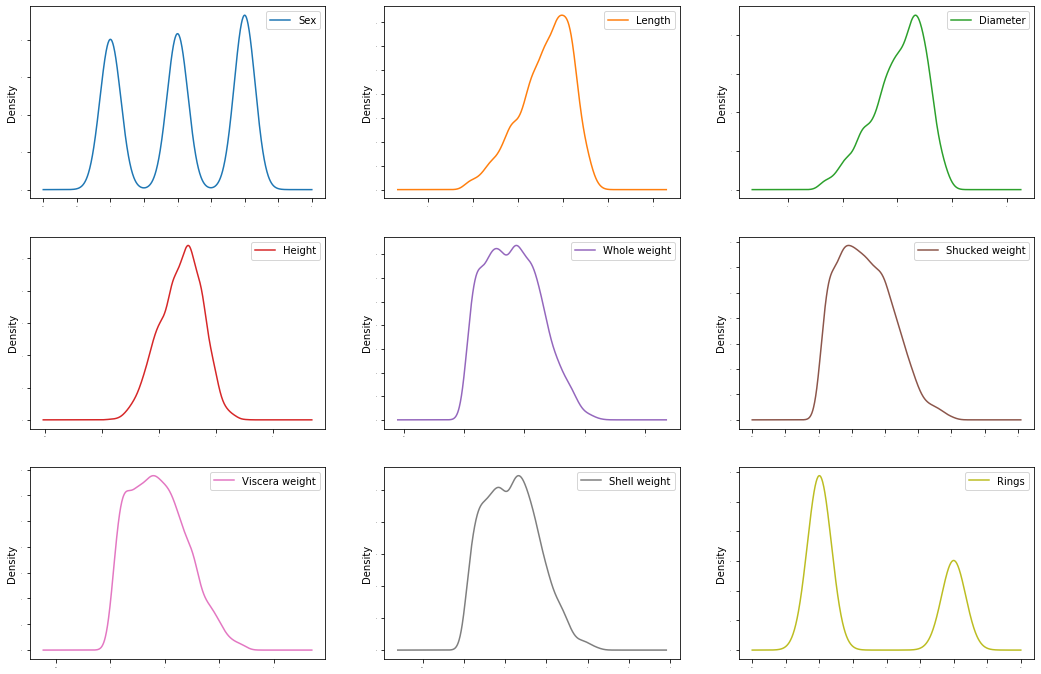

In [39]:
df_1.plot(kind='density',subplots=True,layout=(3,3),sharex=False,fontsize=1,figsize=(18,12))

Observation :-

1. Length and Diameter are left skewed.
2. Rings are right skewed

In [40]:
df_1.skew()

Sex              -0.092911
Length           -0.633786
Diameter         -0.605450
Height           -0.247192
Whole weight      0.323886
Shucked weight    0.449573
Viscera weight    0.429932
Shell weight      0.358512
Rings             0.678720
dtype: float64

In [41]:
x=df_1[['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']]

In [42]:
y=df_1['Rings']
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Rings, dtype: int64

In [43]:
df_1.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [45]:
x=pd.DataFrame(x)

In [46]:
x.columns=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']

In [47]:
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.157744,-0.579888,-0.431023,-1.176592,-0.643836,-0.610645,-0.731485,-0.642187
1,1.157744,-1.487451,-1.474473,-1.311741,-1.274762,-1.218024,-1.239599,-1.260107
2,-1.280114,0.068371,0.142874,-0.095405,-0.287369,-0.455155,-0.339512,-0.178747
3,1.157744,-0.709540,-0.431023,-0.365702,-0.639463,-0.654376,-0.605666,-0.603567
4,-0.061185,-1.660320,-1.578818,-1.582038,-1.319594,-1.266615,-1.326704,-1.375967


In [48]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    print('Accuracy score of Logistic Regression','is:')
    accu_score=accuracy_score(y_test,pred)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    if accu_score>maxAccu:
        maxAccu=accu_score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Accuracy score of Logistic Regression is:
0.7953281423804227
[[553  54]
 [130 162]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       607
           1       0.75      0.55      0.64       292

    accuracy                           0.80       899
   macro avg       0.78      0.73      0.75       899
weighted avg       0.79      0.80      0.79       899

Accuracy score of Logistic Regression is:
0.7719688542825361
[[512  70]
 [135 182]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       582
           1       0.72      0.57      0.64       317

    accuracy                           0.77       899
   macro avg       0.76      0.73      0.74       899
weighted avg       0.77      0.77      0.76       899

Accuracy score of Logistic Regression is:
0.7664071190211346
[[511  74]
 [136 178]]
              precision    recall  f1-score   support

           0       0.79      0.87      

Best accuracy is 0.8109010011123471 on Random_state 102

# Algorithms

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=102)
lm=LogisticRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print('Accuracy score of Logistic Regression','is:')
accu_score=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score of Logistic Regression is:
0.8120133481646273
[[557  52]
 [117 173]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       609
           1       0.77      0.60      0.67       290

    accuracy                           0.81       899
   macro avg       0.80      0.76      0.77       899
weighted avg       0.81      0.81      0.80       899



Accuracy score of Logistic Regression is: 0.8120133481646273

In [51]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score of DecisionTreeClassifier','is:')
accu_score=accuracy_score(y_test,preddtc)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

Accuracy score of DecisionTreeClassifier is:
0.7352614015572859
[[483 126]
 [112 178]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       609
           1       0.59      0.61      0.60       290

    accuracy                           0.74       899
   macro avg       0.70      0.70      0.70       899
weighted avg       0.74      0.74      0.74       899



Accuracy score of DecisionTreeClassifier is: 0.7352614015572859


In [52]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy score of knn','is:')
accu_score=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score of knn is:
0.8120133481646273
[[557  52]
 [117 173]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       609
           1       0.77      0.60      0.67       290

    accuracy                           0.81       899
   macro avg       0.80      0.76      0.77       899
weighted avg       0.81      0.81      0.80       899



Accuracy score of knn is: 0.8120133481646273

In [53]:
svm=SVC()
svm.fit(x_train,y_train)
predsvc=svm.predict(x_test)
print('Accuracy score of knn','is:')
accu_score=accuracy_score(y_test,predsvc)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy score of knn is:
0.8020022246941045
[[540  69]
 [109 181]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       609
           1       0.72      0.62      0.67       290

    accuracy                           0.80       899
   macro avg       0.78      0.76      0.76       899
weighted avg       0.80      0.80      0.80       899



Accuracy score of knn is: 0.8020022246941045

In [54]:
bnb=GaussianNB()
bnb.fit(x_train,y_train)
predbnb=bnb.predict(x_test)
print('Accuracy score of BinomialNB','is:')
accu_score=accuracy_score(y_test,predbnb)
print(accuracy_score(y_test,predbnb))
print(confusion_matrix(y_test,predbnb))
print(classification_report(y_test,predbnb))

Accuracy score of BinomialNB is:
0.6952169076751946
[[412 197]
 [ 77 213]]
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       609
           1       0.52      0.73      0.61       290

    accuracy                           0.70       899
   macro avg       0.68      0.71      0.68       899
weighted avg       0.74      0.70      0.70       899



Accuracy score of BinomialNB is: 0.6952169076751946

In [55]:
# Ensembler Techniques

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy score of RandomForestClassifier','is:')
accu_score=accuracy_score(y_test,predrf)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score of RandomForestClassifier is:
0.7864293659621802
[[523  86]
 [106 184]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       609
           1       0.68      0.63      0.66       290

    accuracy                           0.79       899
   macro avg       0.76      0.75      0.75       899
weighted avg       0.78      0.79      0.78       899



Accuracy score of RandomForestClassifier is: 0.7864293659621802


In [56]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Accuracy score of AdaBoostClassifier','is:')
accu_score=accuracy_score(y_test,predad)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

Accuracy score of AdaBoostClassifier is:
0.7886540600667408
[[544  65]
 [125 165]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       609
           1       0.72      0.57      0.63       290

    accuracy                           0.79       899
   macro avg       0.77      0.73      0.74       899
weighted avg       0.78      0.79      0.78       899



Accuracy score of AdaBoostClassifier is: 0.7886540600667408

# Cross Validation Score

In [57]:
from sklearn.model_selection import cross_val_score
lmscores=cross_val_score(lm,x,y,cv=5)
print(lmscores)
print(lmscores.mean(),lmscores.std())

[0.8127295  0.75152999 0.76621787 0.78824969 0.75490196]
0.7747258021935824 0.022937270798245857


In [58]:
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.6744186  0.71970624 0.70624235 0.69889841 0.69730392]
0.699313905488756 0.014750182531071292


In [59]:
list1=[0.8120133481646273,0.8120133481646273]
list2=[0.7747258021935824,0.6939304485564115]
difference=[]
zip_object = zip(list1, list2)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)


print(difference)

[0.03728754597104489, 0.11808289960821583]


# Logistic Regression is the best algorithm.

# Hyper Parameter Tuning

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=102)
lm=LogisticRegression()
grid_param={'penalty' : ['l1', 'l2', 'elasticnet', 'none']}
gd_sr=GridSearchCV(estimator=lm,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='accuracy')

In [62]:
gd_sr.best_params_

{'penalty': 'none'}

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=102)
lm=LogisticRegression()
grid_param={'dual' : [True,False]}
gd_sr=GridSearchCV(estimator=lm,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'dual': [True, False]}, scoring='accuracy')

In [64]:
gd_sr.best_params_

{'dual': False}

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=102)
lm=LogisticRegression()
grid_param={'tol' : [0.0001,0.001,0.01,0.1,1]}
gd_sr=GridSearchCV(estimator=lm,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'tol': [0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [66]:
gd_sr.best_params_

{'tol': 0.1}

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=102)
lm=LogisticRegression()
grid_param={'fit_intercept' : [True,False]}
gd_sr=GridSearchCV(estimator=lm,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'fit_intercept': [True, False]}, scoring='accuracy')

In [68]:
gd_sr.best_params_

{'fit_intercept': True}

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=102)
lm_hp=LogisticRegression(penalty= 'none',dual=False,tol=0.1,fit_intercept=True)
lm_hp.fit(x_train,y_train)
predlmhp=lm_hp.predict(x_test)
print('Accuracy score of Logistic Regression','is:')
accu_score=accuracy_score(y_test,predlmhp)
print(accuracy_score(y_test,predlmhp))
print(confusion_matrix(y_test,predlmhp))
print(classification_report(y_test,predlmhp))

Accuracy score of Logistic Regression is:
0.8120133481646273
[[557  52]
 [117 173]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       609
           1       0.77      0.60      0.67       290

    accuracy                           0.81       899
   macro avg       0.80      0.76      0.77       899
weighted avg       0.81      0.81      0.80       899



AS After HyperParameter Tuning : Accuracy score of Logistic Regression is 0.8120133481646273
Before HyperParameter Tuning : Accuracy score of Logistic Regression is 0.8120133481646273
AS Before HyperParameter Tuning = AS After HyperParameter Tuning 

In [70]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [71]:
y_pred_prob=lm_hp.predict_proba(x_test)[:,1]

In [72]:
y_pred_prob

array([0.85135866, 0.05743426, 0.24511587, 0.0886227 , 0.40906673,
       0.13871778, 0.52859385, 0.29085523, 0.68686591, 0.22591001,
       0.27490726, 0.16588974, 0.10378263, 0.08121152, 0.17936638,
       0.74374883, 0.0781525 , 0.18659089, 0.16940638, 0.13957328,
       0.20291525, 0.47413082, 0.31354745, 0.56341699, 0.84039932,
       0.46111154, 0.8733146 , 0.12746611, 0.23389341, 0.13201722,
       0.54137885, 0.2212221 , 0.36377099, 0.14126534, 0.67334338,
       0.08901939, 0.07878489, 0.43418969, 0.07437262, 0.6393251 ,
       0.06515423, 0.15497934, 0.08203392, 0.34771493, 0.05723649,
       0.13896831, 0.42623732, 0.07304301, 0.47277553, 0.15759276,
       0.6980027 , 0.90289195, 0.91453524, 0.30433578, 0.03566617,
       0.148905  , 0.04589219, 0.48735447, 0.70619149, 0.16386531,
       0.55689724, 0.22207829, 0.21324565, 0.82268157, 0.03030127,
       0.23251177, 0.03008161, 0.6459695 , 0.17010949, 0.63954452,
       0.16586857, 0.52145243, 0.32732526, 0.16465272, 0.48445

In [73]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [74]:
fpr

array([0.        , 0.        , 0.        , 0.00164204, 0.00164204,
       0.00328407, 0.00328407, 0.00492611, 0.00492611, 0.00656814,
       0.00656814, 0.00821018, 0.00821018, 0.01149425, 0.01149425,
       0.01313629, 0.01313629, 0.01642036, 0.01642036, 0.0180624 ,
       0.0180624 , 0.01970443, 0.01970443, 0.02298851, 0.02298851,
       0.02463054, 0.02463054, 0.02627258, 0.02627258, 0.02791461,
       0.02791461, 0.03448276, 0.03448276, 0.03776683, 0.03776683,
       0.04269294, 0.04269294, 0.04433498, 0.04433498, 0.04597701,
       0.04597701, 0.05090312, 0.05090312, 0.05254516, 0.05254516,
       0.05418719, 0.05418719, 0.05582923, 0.05582923, 0.0591133 ,
       0.0591133 , 0.06075534, 0.06075534, 0.06239737, 0.06239737,
       0.06732348, 0.06732348, 0.06896552, 0.06896552, 0.07060755,
       0.07060755, 0.07389163, 0.07389163, 0.07553366, 0.07553366,
       0.0771757 , 0.0771757 , 0.08538588, 0.08538588, 0.08866995,
       0.08866995, 0.09031199, 0.09031199, 0.09195402, 0.09195

In [75]:
tpr

array([0.        , 0.00344828, 0.03103448, 0.03103448, 0.06206897,
       0.06206897, 0.07586207, 0.07586207, 0.12068966, 0.12068966,
       0.13793103, 0.13793103, 0.21034483, 0.21034483, 0.26551724,
       0.26551724, 0.29310345, 0.29310345, 0.3       , 0.3       ,
       0.34827586, 0.34827586, 0.37586207, 0.37586207, 0.38965517,
       0.38965517, 0.39310345, 0.39310345, 0.40344828, 0.40344828,
       0.42413793, 0.42413793, 0.44137931, 0.44137931, 0.45517241,
       0.45517241, 0.45862069, 0.45862069, 0.46551724, 0.46551724,
       0.47586207, 0.47586207, 0.4862069 , 0.4862069 , 0.48965517,
       0.48965517, 0.49655172, 0.49655172, 0.5       , 0.5       ,
       0.50344828, 0.50344828, 0.5137931 , 0.5137931 , 0.53448276,
       0.53448276, 0.53793103, 0.53793103, 0.54482759, 0.54482759,
       0.54827586, 0.54827586, 0.55517241, 0.55517241, 0.56551724,
       0.56551724, 0.57931034, 0.57931034, 0.59655172, 0.59655172,
       0.6       , 0.6       , 0.60344828, 0.60344828, 0.60689

In [76]:
thresholds

array([1.9975797 , 0.9975797 , 0.96070911, 0.95607959, 0.93162885,
       0.93096201, 0.92464574, 0.92048517, 0.88682242, 0.88613686,
       0.87355976, 0.8733146 , 0.82926888, 0.82268157, 0.78480975,
       0.77753482, 0.75896773, 0.7563583 , 0.75053019, 0.74981146,
       0.72575235, 0.7246789 , 0.71229224, 0.70619149, 0.70373761,
       0.70278265, 0.6980027 , 0.69441974, 0.69197576, 0.68934098,
       0.67871353, 0.66766114, 0.65831813, 0.65364828, 0.6477789 ,
       0.64582687, 0.64467393, 0.64374243, 0.64061195, 0.63954452,
       0.62589911, 0.61704501, 0.61380188, 0.6088682 , 0.60090975,
       0.60039502, 0.58560286, 0.58518614, 0.5851466 , 0.58148495,
       0.57983581, 0.57715765, 0.57006431, 0.56953254, 0.56147572,
       0.55436634, 0.55107439, 0.55095533, 0.54540362, 0.54503816,
       0.54441513, 0.54143697, 0.54094942, 0.53798178, 0.53562704,
       0.5348705 , 0.52550632, 0.52015793, 0.50226243, 0.49402392,
       0.49304735, 0.49182812, 0.48978161, 0.48900548, 0.48735

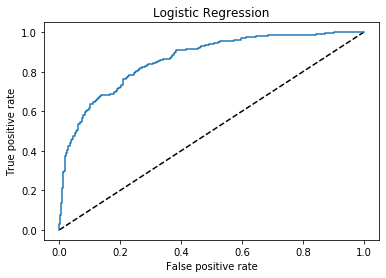

In [77]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

Observations :-
    
1. As the line is moving towards 1, so we can conclude that we have developed good model.

# Saving the model

In [78]:
import joblib

In [79]:
joblib.dump(lm_hp,"lm_abalone.obj")

['lm_abalone.obj']